In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [9]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='class')

print("Dataset Shape:")
print(X.shape)

print("\nFeature Names:")
print(X.columns.tolist())

print("\nClass Distribution:")
print(y.value_counts())

Dataset Shape:
(178, 13)

Feature Names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class Distribution:
class
1    71
0    59
2    48
Name: count, dtype: int64


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Principal Components (Eigenvectors):")
print(pca_2d.components_)

print("\nEigenvalues:")
print(pca_2d.explained_variance_)

print("\nExplained Variance Ratios:")
print(pca_2d.explained_variance_ratio_)

print(f"\nTotal Variance Explained by 2 Components: {sum(pca_2d.explained_variance_ratio_):.4f}")

Principal Components (Eigenvectors):
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]]

Eigenvalues:
[4.73243698 2.51108093]

Explained Variance Ratios:
[0.36198848 0.1920749 ]

Total Variance Explained by 2 Components: 0.5541


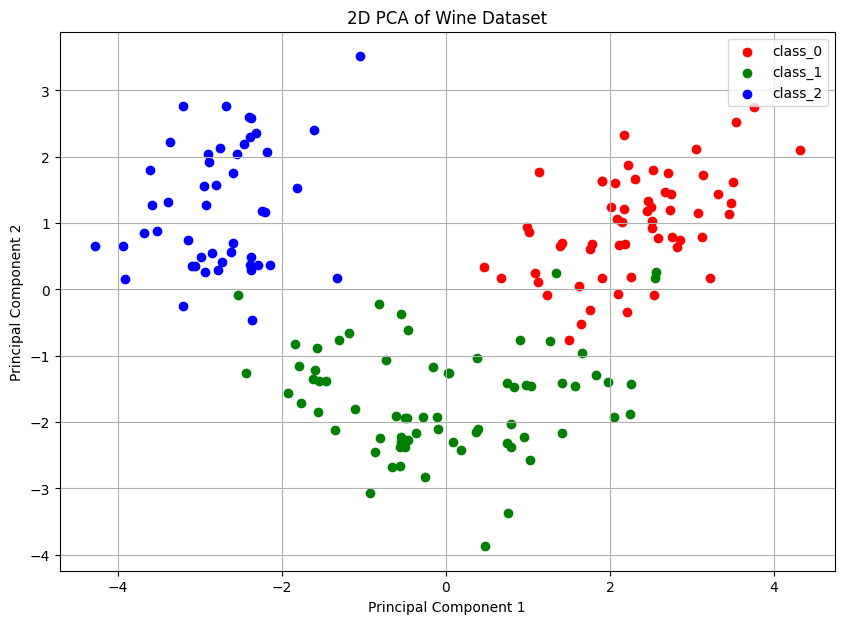

In [12]:
plt.figure(figsize=(10, 7))
targets = np.unique(y)
colors = ['r', 'g', 'b']
class_names = wine.target_names

for target, color, name in zip(targets, colors, class_names):
    indices_to_keep = y == target
    plt.scatter(X_pca_2d[indices_to_keep, 0],
                X_pca_2d[indices_to_keep, 1],
                c=color,
                label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Dataset')
plt.legend()
plt.grid()
plt.show()

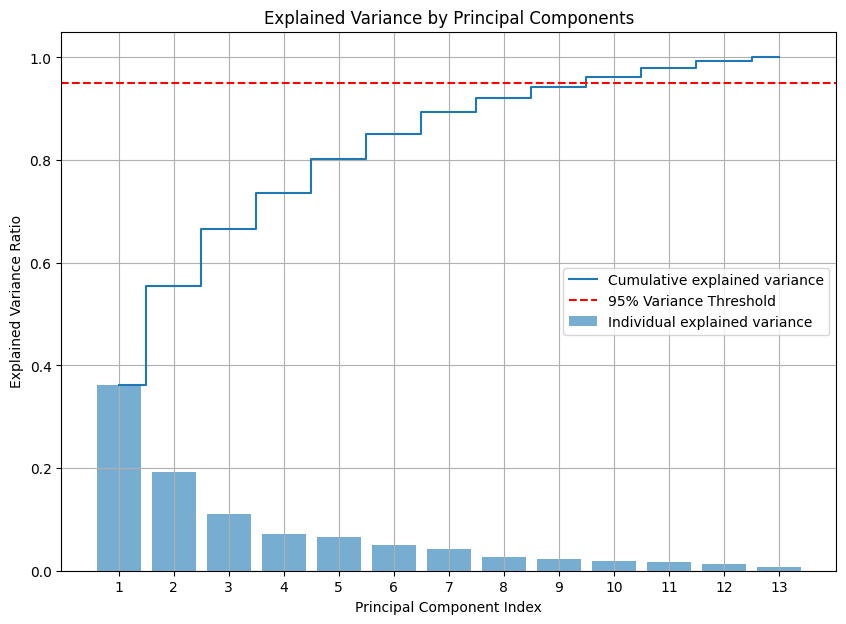

In [13]:
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.xticks(ticks=range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()